<a href="https://colab.research.google.com/github/21lucasr2/pydata-book/blob/3rd-edition/Copy_of_MovieReviewsNLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB movie reviews (positive, negative)

In [63]:
#importing basic libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [64]:
movie_url = 'https://github.com/usm-cos422-522/courseMaterials/blob/main/data/IMDB%20Dataset.csv?raw=true'
df = pd.read_csv(movie_url, header='infer',nrows=10000)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


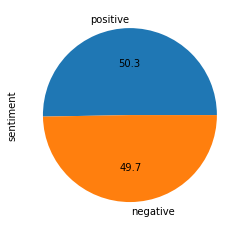

In [65]:
#equal division of positive and negative sentiment
df['sentiment'].value_counts().plot(kind='pie',autopct='%.1f')

## TEXT CLEANING AND TRAINING STEP BY STEP:

#### 1)Removal of HTML contents like "< br>".

#### 2)Removal of punctutions, special characters like '\'.

#### 3)Removal of stopwords like is, the which do not offer much insight.

#### 4)Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

#### 5) Visualization

#### 6)Vectorization - Encode the numeric values once you have cleaned it.

#### 7)Fit the data to the ML model.


#### Removal of HTML contents like "< br>".


In [66]:
#1. Removing all html tags

from bs4 import BeautifulSoup
def html_remover(text):
    soup=BeautifulSoup(text,'html.parser')
    a=soup.get_text()
    return a
df['review']=df['review'].apply(html_remover)
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [67]:
# ^ Negated set : match any character not in the set
# * 0 or more non-] characters
import nltk
import re
nltk.re_show('\[[^]]*\]',"[&&&] Goodbye [So long] []")
print(re.sub('\[[^]]*\]', '', "[&&&] Goodbye [So long] []"))
nltk.re_show('[^a-zA-Z]',"&& % Goodbye 7 8So long9")
re.sub('[^a-zA-Z]', ' ', "&& % Goodbye 7 8So long9")

{[&&&]} Goodbye {[So long]} {[]}
 Goodbye  
{&}{&}{ }{%}{ }Goodbye{ }{7}{ }{8}So{ }long{9}


'     Goodbye    So long '

#### Removal of punctutions, special characters like '\'.


In [68]:
#2. Removal of punctuations and special characters
import re
def sp_char_remover(review):
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    return review
df['review']=df['review'].apply(sp_char_remover)
df['review'][1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [69]:

#Converting To lower
def lower(text):
    return text.lower()
df['review']=df['review'].apply(lower)
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend  sitting in the air conditioned theater and watching a light hearted comedy  the plot is simplistic  but the dialogue is witty and the characters are likable  even the well bread suspected serial killer   while some may be disappointed when they realize this is not match point    risk addiction  i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years  dare i say a decade    while i ve never been impressed with scarlet johanson  in this she managed to tone down her  sexy  image and jumped right into a average  but spirited young woman this may not be the crown jewel of his career  but it was wittier than  devil wears prada  and more interesting than  superman  a great comedy to go see with friends '

#### Removal of stopwords like is, the which do not offer much insight.


In [70]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
def remove_stop_words(text):
    text = ' '.join([word for word in text.split() if word not in sw])
    return text

In [72]:
df['review'] = df['review'].apply(remove_stop_words)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


#### Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

In [73]:
# Snowball is Porter2
from nltk.stem import SnowballStemmer


def stemming(text):
    text=' '.join([snow.stem(word) for word in text.split()])
    return text

snow=SnowballStemmer('english')
result = df['review'].apply(stemming)
print(result[1])

wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done


In [74]:

# Lemmatizing the stopwords and then joining it back
#      Lemmatization is similar to stemming but it brings context to the words. 
#      So it links words with similar meanings to one word. 
#      Lemmatization looks at surrounding text to determine a given word’s part of speech
#
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem=WordNetLemmatizer()

def lemma_join(text):
    text=[lem.lemmatize(word) for word  in text.split()]
    text=" ".join(text)
    return text

df['review']=df['review'].apply(lemma_join)        
print(df['review'][1])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


#### Visualization

In [75]:
#New column (clean length) after removal of punctuations and stopwords
#  let's see if there are significant differences in review length

df['clean_length']=df['review'].str.len()

In [76]:
#Label coding 0 and 1
df['sentiment'].replace({'negative':0,'positive':1},inplace=True)

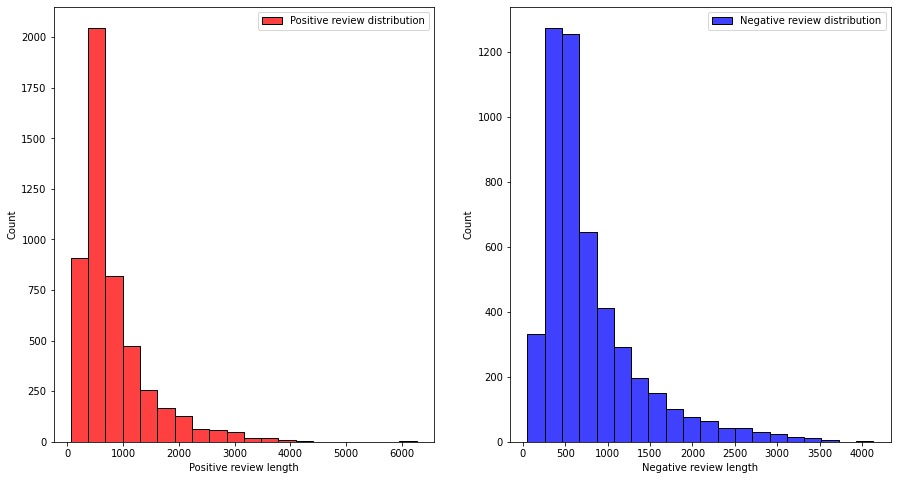

In [77]:
#Message distribution before cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.histplot(df[df['sentiment']==1]['clean_length'],bins=20,ax=ax[0],label='Positive review distribution',color='r')

ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.histplot(df[df['sentiment']==0]['clean_length'],bins=20,ax=ax[1],label='Negative review distribution',color='b')

ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()

In [78]:
#!pip install wordcloud

In [79]:
from wordcloud import WordCloud

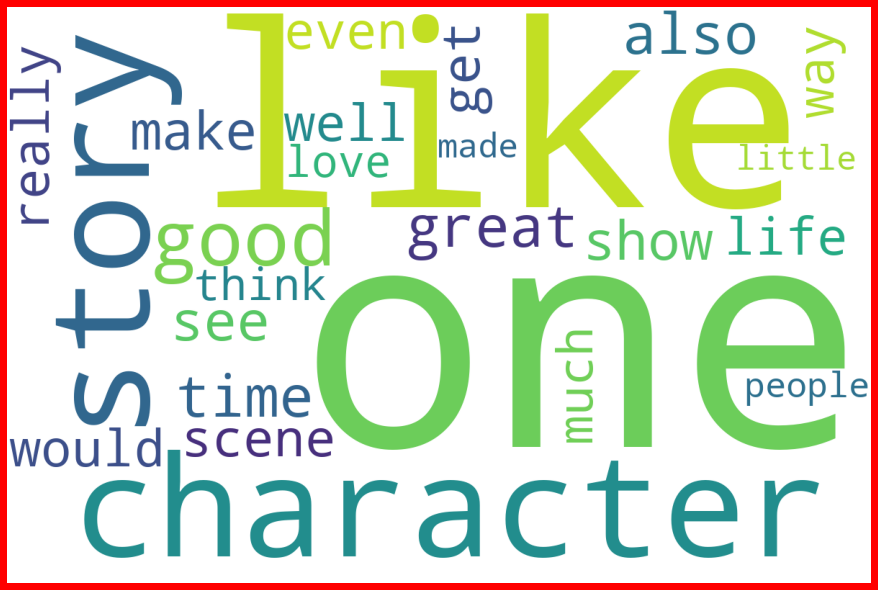

In [80]:
#Getting sense of loud words in positive sentiments
# Essentially, word clouds generators work by breaking the text down into component 
#   words and counting how frequently they appear in the body of text.
positive=df['review'][df['sentiment']==1]
wc_stop_words =  ['film','movie'] + list(sw)
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25,stopwords=wc_stop_words).generate(' '.join(positive))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

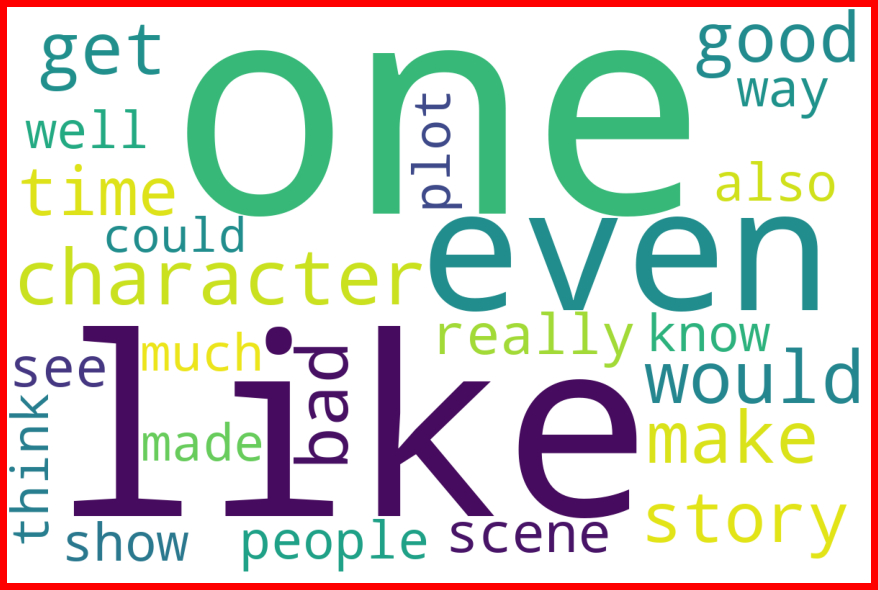

In [81]:
#Getting sense of loud words in negative sentiments
negative=df['review'][df['sentiment']==0]
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25,stopwords=wc_stop_words).generate(' '.join(negative))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Vectorization - Encode the numeric values once you have cleaned it.

In [82]:
X = df['review']
y = df['sentiment']

In [83]:
#5. Count Vectorization (Bag of words model)
#  The bag-of-words model is a simplifying representation used in 
#    natural language processing and information retrieval (IR). 
#    In this model, a text (such as a sentence or a document) is represented as the bag 
# (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.
# Count Vectorization involves counting the number of occurrences each words appears in a document 
#
#   fit_transform normalizes data x-m/std
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features = 1000, ngram_range=(1,2))

bag_of_words = cv.fit_transform(X)

df_bow = pd.DataFrame(data=bag_of_words.toarray(),columns = cv.get_feature_names_out())
df_bow['Length'] = df['review'].str.len()
df_bow.head()

,ability,able,absolutely,accent,across,act,acted,acting,action,actor,...,yeah,year,year ago,year old,yes,yet,york,young,zombie,Length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1070
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,641
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,565
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,425
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,840


#### Fit the data to the ML model.


In [84]:
from sklearn.model_selection import train_test_split

df_train, df_test, train_data_label, test_data_label = train_test_split(df_bow, y, test_size=0.20, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [86]:
lr.fit(df_train,train_data_label)
y_pred=lr.predict(df_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(test_data_label,y_pred))
print("ACCURACY SCORE IS: ",accuracy_score(test_data_label,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       996
           1       0.82      0.85      0.83      1004

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

ACCURACY SCORE IS:  0.83


In [88]:
coefs=lr.coef_[0]
top_ten = np.argpartition(coefs, -10)[-10:]
top_ten_sorted=top_ten[np.argsort(coefs[top_ten])]
print(df_train.columns[top_ten_sorted])

Index(['well', 'loved', 'favorite', 'love', 'still', 'perfect', 'wonderful',
       'excellent', 'best', 'great'],
      dtype='object')


In [89]:
from sklearn.ensemble import RandomForestClassifier
 
# Instantiate Random Forest Classifier
model = RandomForestClassifier(n_estimators=800,max_depth=4,min_samples_leaf=0.001,random_state=42,n_jobs=-1)
 
# Fit model to the training set
model.fit(df_train, train_data_label)
y_pred = model.predict(df_test)

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(test_data_label,y_pred))
print("ACCURACY SCORE IS: ",accuracy_score(test_data_label,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       996
           1       0.75      0.91      0.82      1004

    accuracy                           0.80      2000
   macro avg       0.82      0.80      0.80      2000
weighted avg       0.82      0.80      0.80      2000

ACCURACY SCORE IS:  0.8015


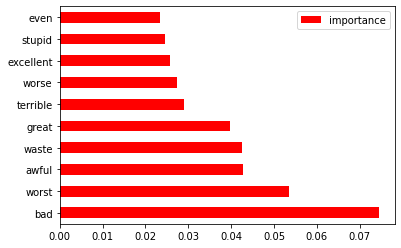

In [91]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = df_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances[0:10].plot(kind='barh',color='red')

**Breakout Room Exercise**

After Following the steps to pre-process the reviews and train our Classifier we find a ~77% accuracy score for our model. I.e, given a new review with a ~77% accuracy it can distingusih between Positive reviews and Negative reviews.

But some decisions were made along the way that could be revisited to improve performance:

*   the length of the review was not included in the bag of words dataframe (df_bow) It was in the original df.
*   the number of words was limited to the top 200 words when CountVectorization was performed
*   the bag of words only consisted of single words, so pairs of words like "not good" lost meaning in the vectorization. The CountVectorization function allows for ngrams to be formed (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 
*   the read_csv function limited the number of records to 5000  (made the training faster). 